In [2]:

import torch_geometric.loader as loader

import networkx as nx
from pathlib import Path
from torch_geometric.datasets import ZINC
from torch_geometric.utils import to_networkx

def get_zinc_ds():
    root = Path.cwd()
    project_dir = root.resolve().parent
    datasets = project_dir / "datasets_"
    return ZINC(root=datasets / 'test' / 'zinc_subset', subset=True)

In [3]:



dataset = get_zinc_ds()

dataset.print_summary()
print(f"{dataset.num_classes=}")
print(f"{dataset.num_node_features=}")
print(f"{dataset.num_features=}")
print(f"{dataset.num_edge_features=}")

print(len(dataset))
print(dataset[0])
d = dataset[1]
d.print_summary()

100%|██████████| 10000/10000 [00:00<00:00, 29126.56it/s]
/Users/arvandkaveh/Projects/kit/graph_hdc/.venv/lib/python3.13/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


ZINC (#graphs=10000):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     23.2 |     49.9 |
| std        |      4.5 |     10.6 |
| min        |      9   |     16   |
| quantile25 |     20   |     42   |
| median     |     23   |     50   |
| quantile75 |     26   |     56   |
| max        |     37   |     82   |
+------------+----------+----------+
dataset.num_classes=9994
dataset.num_node_features=1
dataset.num_features=1
dataset.num_edge_features=1
10000
Data(x=[29, 1], edge_index=[2, 64], edge_attr=[64], y=[1])


AttributeError: 'GlobalStorage' object has no attribute 'print_summary'

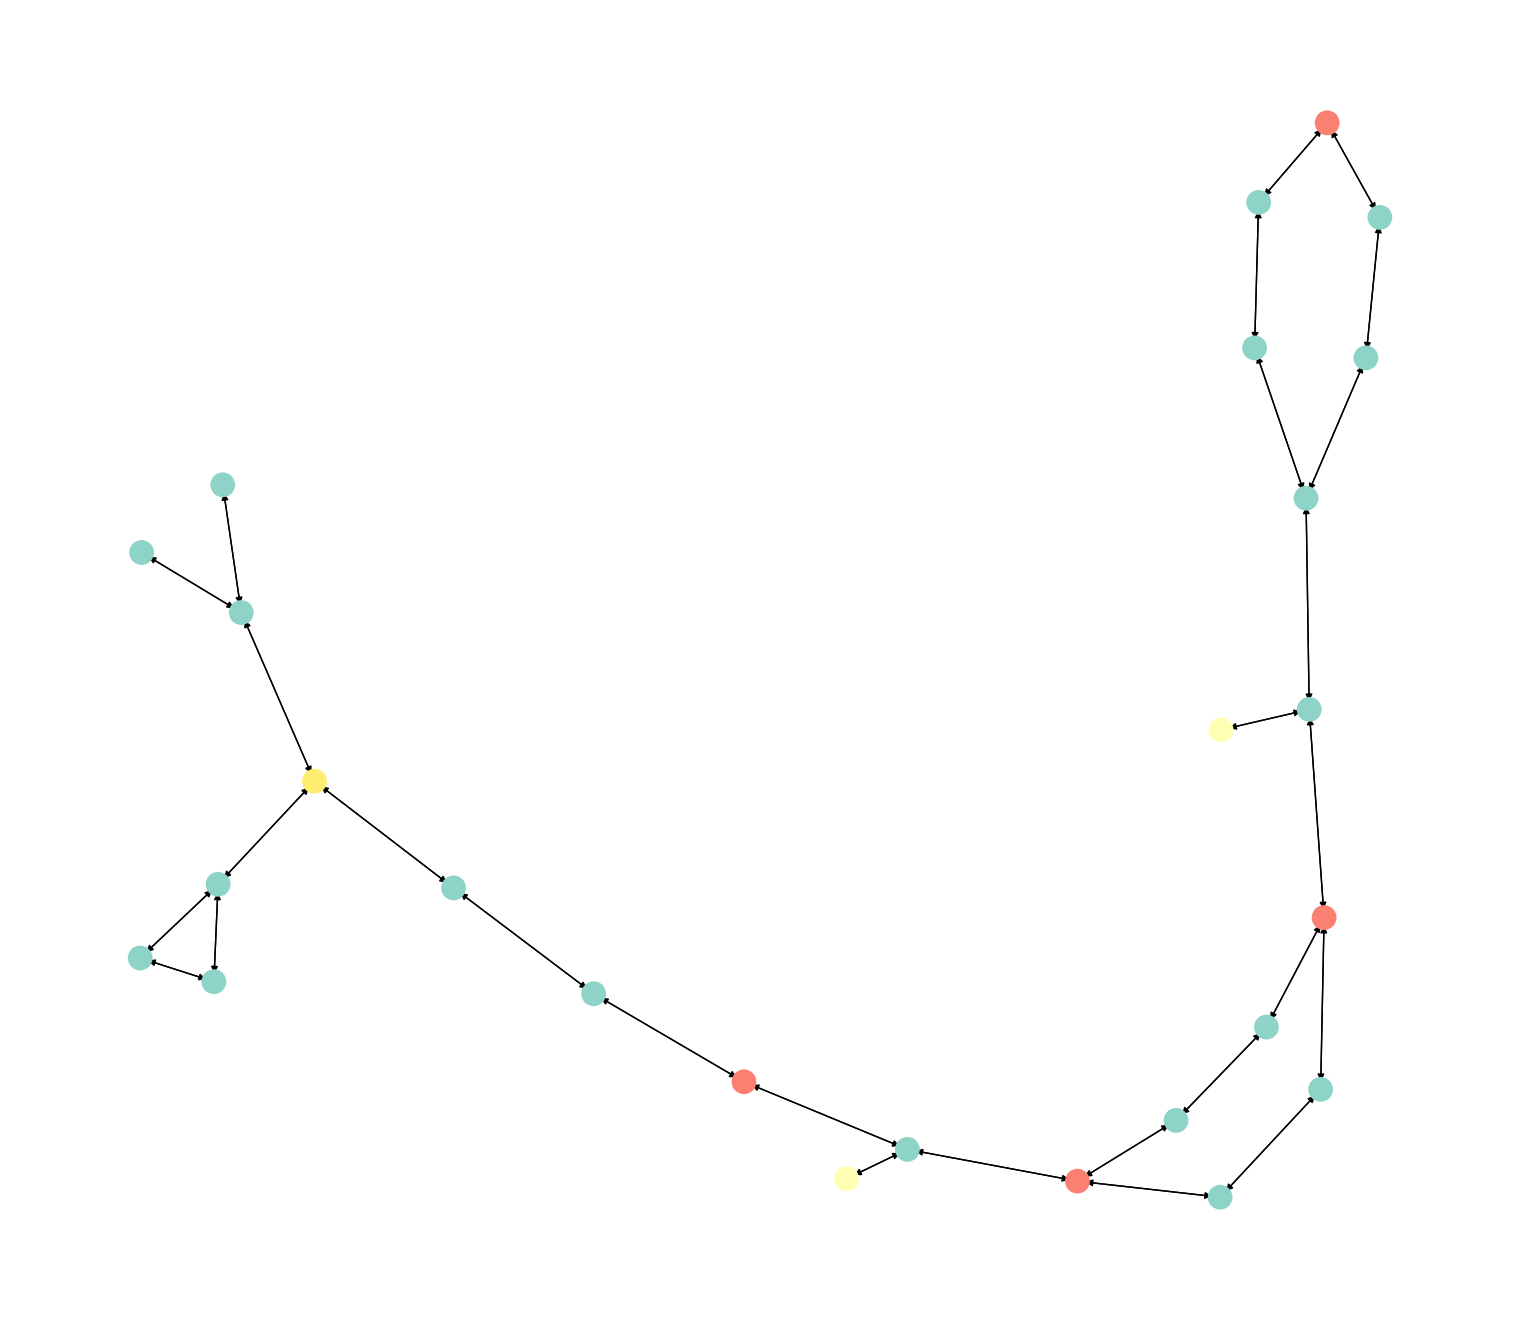

In [13]:
vis = to_networkx(d)

node_labels = d.x.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13))
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=140,linewidths=6)
plt.show()

In [4]:

node_codes = set()
bond_codes = set()

for data in dataset:
    # data.x is shape [num_nodes,1], so squeeze to get a 1D list of ints
    node_codes |= set(data.x.view(-1).tolist())
    # data.edge_attr is already a 1D LongTensor of bond‐order ints
    bond_codes |= set(data.edge_attr.tolist())

print("Unique atom‐type codes:", sorted(node_codes))
print("Number of distinct atom‐types:", len(node_codes))
print("Unique bond‐type codes:", sorted(bond_codes))
print("Number of distinct bond‐types:", len(bond_codes))

Unique atom‐type codes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Number of distinct atom‐types: 21
Unique bond‐type codes: [1, 2, 3]
Number of distinct bond‐types: 3


In [18]:
loader = loader.DataLoader(dataset, batch_size=16)
batch = next(iter(loader))
batch

DataBatch(x=[351, 1], edge_index=[2, 750], edge_attr=[750], y=[16], batch=[351], ptr=[17])

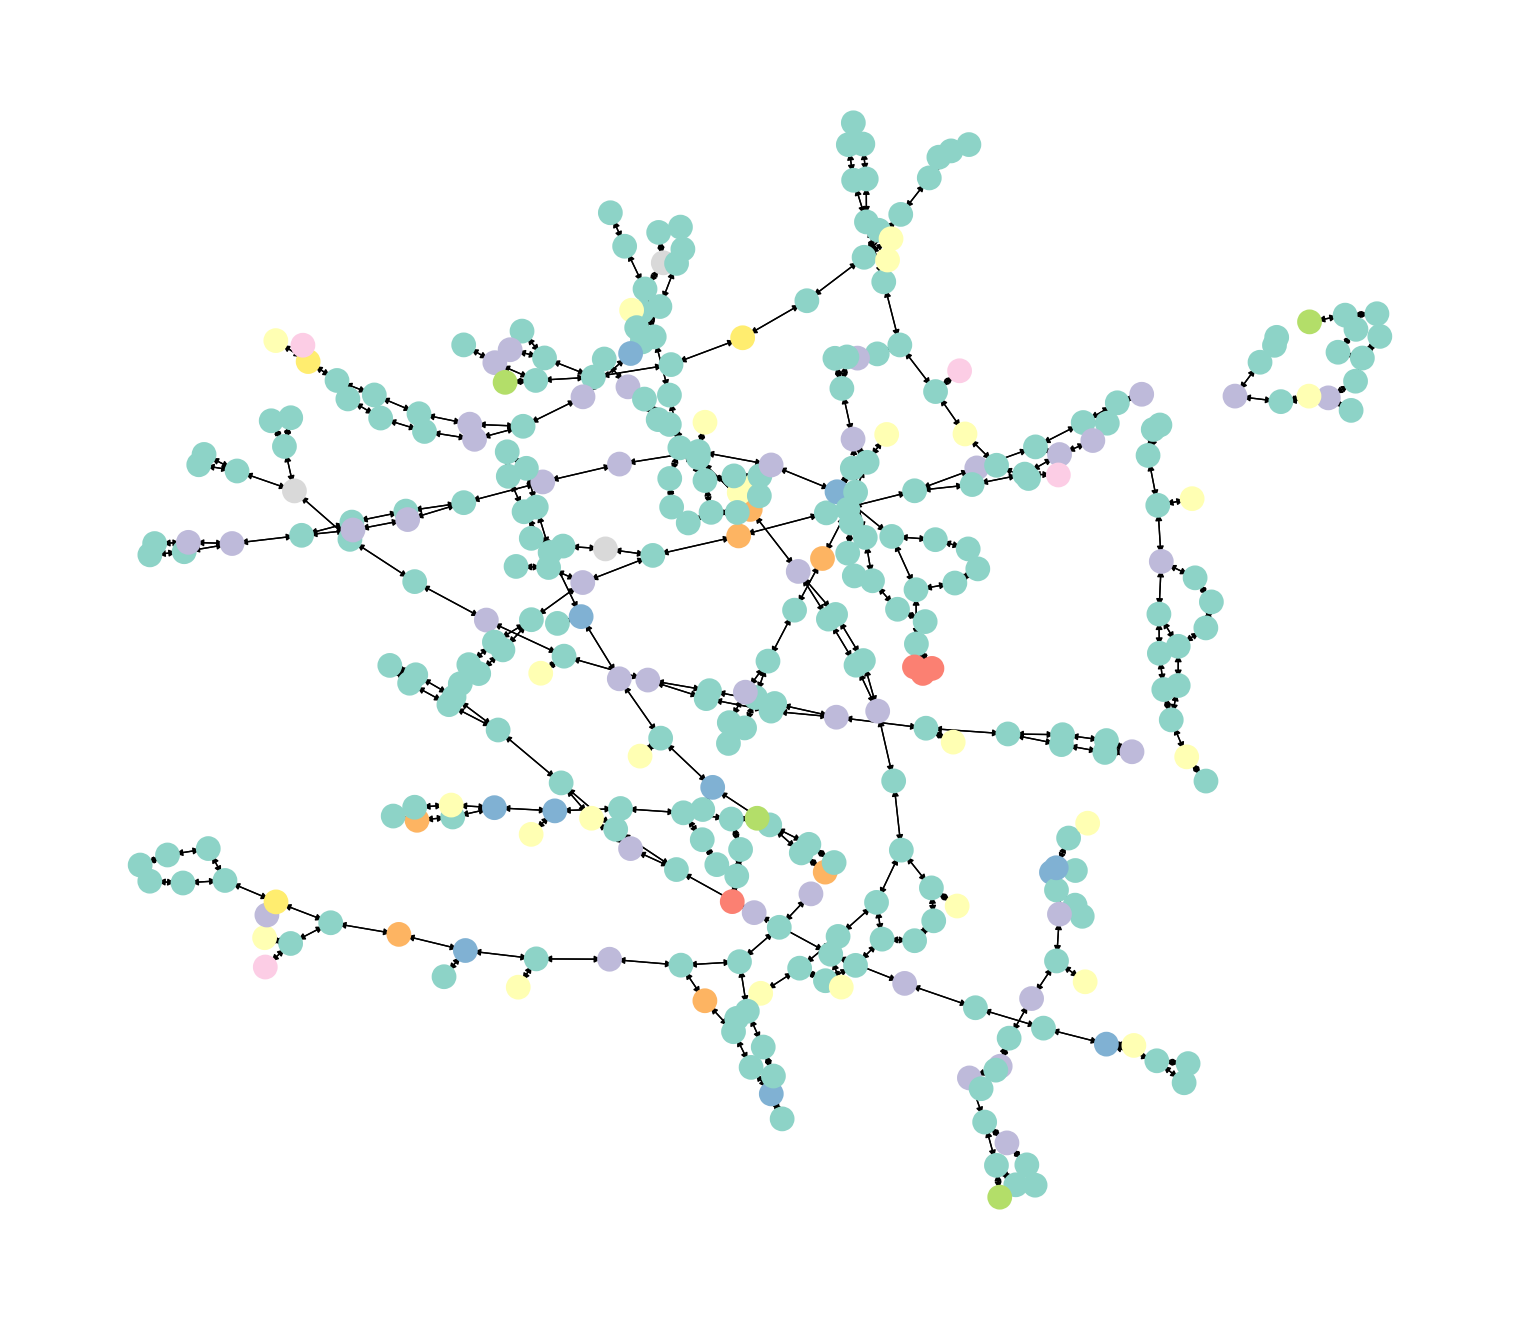

In [19]:
vis_batch = to_networkx(batch)

node_labels = batch.x.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13))
nx.draw(vis_batch, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=140,linewidths=6)
plt.show()